In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/Censo_SUAS_2023_Familia_Acolhedora_Dados_Gerais 1.csv', sep=';', encoding='latin1', low_memory=False)

In [3]:
df_dados_gerais.head()

,IBGE,NU_IDENTIFICADOR,q0_1,q0_2,q0_3,q0_4,q0_5,q0_6,q0_7,q0_8,...,q44_12_1_velha,q44_12_2_velha,q44_12_3_velha,q44_12_4_velha,q44_12_5_velha,q44_12_6_velha,q44_12_7_velha,q44_12_8_velha,q44_12_9_velha,d12
0,110011,"1,10011E+12",UNIDADE DE ACOLHIMENTO EM FAMÍLIA ACOLHEDORA,3,RIO BRANCO,1444,NaN,SETOR 02,NaN,76890-000,...,1,0,0,0,0,0,0,0,0,2023
1,110012,"1,10012E+12",UNIDADE DE ACOLHIMENTO FAMILIAR EM FAMÍLIA AC...,32,Miguel Galdino,85,NaN,Jardim dos Migrantes,NaN,76900-804,...,0,0,0,0,0,0,0,0,1,2022
2,110020,"1,1002E+12",UNIDADE DE ACOLHIMENTO,32,Geraldo Ferreira,135,CREAS,Agenor de Carvalho,CREAS,76820-316,...,0,0,0,0,0,0,0,0,0,De 2016 a 2019
3,120040,"1,2004E+12",UNIDADE DE ACOLHIMENTO SERVIÇO DE ACOLHIMENTO ...,32,AMOTY PASCOAL,110,NaN,RUY LINO,NaN,69917-405,...,0,0,0,0,0,0,0,0,0,De 2011 a 2015
4,130170,"1,3017E+12",Unidade de Acolhimento,32,Pará,0,NaN,São Crsitóvão,NaN,69800-000,...,0,0,0,0,0,0,0,0,1,De 2020 a 2021


In [4]:
df_dados_gerais.columns.tolist()

['IBGE',
 'NU_IDENTIFICADOR',
 'q0_1',
 'q0_2',
 'q0_3',
 'q0_4',
 'q0_5',
 'q0_6',
 'q0_7',
 'q0_8',
 'q0_9',
 'q0_10',
 'q0_11',
 'q0_12',
 'q0_13',
 'q0_14',
 'Latitude',
 'Longitude',
 'q1',
 'q2',
 'q3_1',
 'q3_2',
 'q3_3',
 'q3_0',
 'q3_98',
 'q4',
 'q5',
 'q5_98',
 'q6_1',
 'q6_2',
 'q6_99',
 'q6_0',
 'q6_99_1',
 'q7',
 'q8',
 'q9',
 'q10',
 'q11_1',
 'q11_2',
 'q11_99',
 'q11_0',
 'q11_98',
 'q11_99_1',
 'q12',
 'q13',
 'q14',
 'q14_98',
 'q15_1',
 'q15_2',
 'q15_3',
 'q15_99',
 'q15_0',
 'q15_99_1',
 'q16',
 'q16_99_1',
 'q17',
 'q18',
 'q19',
 'q19_98',
 'q20_1_1',
 'q20_1_2',
 'q20_1_3',
 'q20_1_4',
 'q20_1_5',
 'q20_1_6',
 'q20_1_8',
 'q20_1_9',
 'q20_2_1',
 'q20_2_2',
 'q20_2_3',
 'q20_2_4',
 'q20_2_5',
 'q20_2_6',
 'q20_2_8',
 'q20_2_9',
 'q21_1',
 'q21_1_98',
 'q21_2',
 'q21_2_98',
 'q21_3',
 'q21_3_98',
 'q22_1',
 'q22_99',
 'q22_99_1',
 'q23_1',
 'q23_2',
 'q23_3',
 'q23_4',
 'q23_5',
 'q23_6',
 'q23_7',
 'q23_8',
 'q23_9',
 'q23_10',
 'q24_1',
 'q24_2',
 'q24_3',
 'q2

In [5]:
len(df_dados_gerais.columns.tolist())

722

In [6]:
rename_cols = {
    'q1':'natureza_unidade',
    'q14':'subsidio_mensal',
    'q18':'qtd_criancas_acolhidas',
    'q19':'qtd_criancas_acolhidas_12meses',
    'q20_1_1':'qtd_masc_0_2',
    'q20_1_2':'qtd_masc_3_5',
    'q20_1_3':'qtd_masc_6_11',
    'q20_1_4':'qtd_masc_12_13',
    'q20_1_5':'qtd_masc_14_15',
    'q20_1_6':'qtd_masc_16_17',
    'q20_1_8':'qtd_masc_acima_18',
    'q20_1_9':'qtd_masc_total',
    'q20_2_1':'qtd_fem_0_2',
    'q20_2_2':'qtd_fem_3_5',
    'q20_2_3':'qtd_fem_6_11',
    'q20_2_4':'qtd_fem_12_13',
    'q20_2_5':'qtd_fem_14_15',
    'q20_2_6':'qtd_fem_16_17',
    'q20_2_8':'qtd_fem_acima_18',
    'q22_1':'qtd_venezuelanos',
    'q23_1':'qtd_criancas_tempo_servico_menos_1mes',
    'q23_2':'qtd_criancas_tempo_servico_1_3meses',
    'q23_3':'qtd_criancas_tempo_servico_4_6meses',
    'q23_4':'qtd_criancas_tempo_servico_7_12meses',
    'q23_5':'qtd_criancas_tempo_servico_13_18meses',
    'q23_6':'qtd_criancas_tempo_servico_19_24meses',
    'q23_7':'qtd_criancas_tempo_servico_25_48meses',
    'q23_8':'qtd_criancas_tempo_servico_49_72meses',
    'q23_9':'qtd_criancas_tempo_mais_72meses',
    'q24_1':'qtd_criancas_deficiencia',
    'q24_2':'qtd_criancas_transt_sofri_psiquico',
    'q24_3':'qtd_criancas_necessidade_especial',
    'q24_4':'qtd_adoles_socioeducativo',
    'q24_5':'qtd_criancas_traj_de_rua',
    'q24_6':'qtd_criancas_indigenas',
    'q24_7':'qtd_criancas_outros_povos_trad',
    'q24_8':'qtd_criancas_dependencia_drogas',
    'q24_9':'qtd_criancas_gestantes',
    'q25_1':'qtd_criancas_pretas',
    'q25_2':'qtd_criancas_pardas',
    'q25_3':'qtd_criancas_brancas',
    'q25_4':'qtd_criancas_amarelas',
    'q25_5':'qtd_criancas_raca_indigenas',
    'q26_1':'qtd_motivo_entrega_voluntaria_adocao',
    'q26_2':'qtd_motivo_orfandade',
    'q26_3':'qtd_motivo_abandono',
    'q26_4':'qtd_motivo_pais_usuarios',
    'q26_5':'qtd_motivo_pais_com_deficiencia',
    'q26_6':'qtd_motivo_pais_transt_sofri_psiquicos',
    'q26_7':'qtd_motivo_pais_ausentes_doenca',
    'q26_8':'qtd_motivo_pais_prisao_ou_internacao',
    'q26_9':'qtd_motivo_violencia_domestica_fisica',
    'q26_10':'qtd_motivo_violencia_domestica_psicologica',
    'q26_11':'qtd_motivo_abuso_sex_intrafamiliar',
    'q26_12':'qtd_motivo_exploracao_sex',
    'q26_13':'qtd_motivo_conflito_familiar',
    'q26_14':'qtd_motivo_exploracao_trabalho',
    'q26_15':'qtd_motivo_pais_cond_especif_saude',
    'q26_16':'qtd_motivo_pais_s_condicoes_depend_quim',
    'q26_17':'qtd_motivo_ameaca_morte',
    'q26_18':'qtd_motivo_situacao_rua',
    'q26_19':'qtd_motivo_negligencia_familia',
    'q26_20':'qtd_motivo_fam_situacao_rua',
    'q26_21':'qtd_motivo_fam_moradia_insalubre',
    'q26_22':'qtd_motivo_fam_carencia_rec_materiais'
}

In [7]:
df_dados_gerais = df_dados_gerais.rename(columns=rename_cols)

In [14]:
cols_filter = [
    'natureza_unidade',
    'subsidio_mensal',
    'qtd_criancas_acolhidas',
    'qtd_criancas_acolhidas_12meses',
    'qtd_masc_0_2',
    'qtd_masc_3_5',
    'qtd_masc_6_11',
    'qtd_masc_12_13',
    'qtd_masc_14_15',
    'qtd_masc_16_17',
    'qtd_masc_acima_18',
    'qtd_masc_total',
    'qtd_fem_0_2',
    'qtd_fem_3_5',
    'qtd_fem_6_11',
    'qtd_fem_12_13',
    'qtd_fem_14_15',
    'qtd_fem_16_17',
    'qtd_fem_acima_18',
    'qtd_venezuelanos',
    'qtd_criancas_tempo_servico_menos_1mes',
    'qtd_criancas_tempo_servico_1_3meses',
    'qtd_criancas_tempo_servico_4_6meses',
    'qtd_criancas_tempo_servico_7_12meses',
    'qtd_criancas_tempo_servico_13_18meses',
    'qtd_criancas_tempo_servico_19_24meses',
    'qtd_criancas_tempo_servico_25_48meses',
    'qtd_criancas_tempo_servico_49_72meses',
    'qtd_criancas_tempo_mais_72meses',
    'qtd_criancas_deficiencia',
    'qtd_criancas_transt_sofri_psiquico',
    'qtd_criancas_necessidade_especial',
    'qtd_adoles_socioeducativo',
    'qtd_criancas_traj_de_rua',
    'qtd_criancas_indigenas',
    'qtd_criancas_outros_povos_trad',
    'qtd_criancas_dependencia_drogas',
    'qtd_criancas_gestantes',
    'qtd_criancas_pretas',
    'qtd_criancas_pardas',
    'qtd_criancas_brancas',
    'qtd_criancas_amarelas',
    'qtd_criancas_raca_indigenas',
    'qtd_motivo_entrega_voluntaria_adocao',
    'qtd_motivo_orfandade',
    'qtd_motivo_abandono',
    'qtd_motivo_pais_usuarios',
    'qtd_motivo_pais_com_deficiencia',
    'qtd_motivo_pais_transt_sofri_psiquicos',
    'qtd_motivo_pais_ausentes_doenca',
    'qtd_motivo_pais_prisao_ou_internacao',
    'qtd_motivo_violencia_domestica_fisica',
    'qtd_motivo_violencia_domestica_psicologica',
    'qtd_motivo_abuso_sex_intrafamiliar',
    'qtd_motivo_exploracao_sex',
    'qtd_motivo_conflito_familiar',
    'qtd_motivo_exploracao_trabalho',
    'qtd_motivo_pais_cond_especif_saude',
    'qtd_motivo_pais_s_condicoes_depend_quim',
    'qtd_motivo_ameaca_morte',
    'qtd_motivo_situacao_rua',
    'qtd_motivo_negligencia_familia',
    'qtd_motivo_fam_situacao_rua',
    'qtd_motivo_fam_moradia_insalubre',
    'qtd_motivo_fam_carencia_rec_materiais'
]

In [15]:
# Seleciona apenas as colunas relevantes para a análise de correlação
df_filtrado = df_dados_gerais[cols_filter]

In [16]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   natureza_unidade                            620 non-null    object 
 1   subsidio_mensal                             593 non-null    object 
 2   qtd_criancas_acolhidas                      620 non-null    int64  
 3   qtd_criancas_acolhidas_12meses              616 non-null    float64
 4   qtd_masc_0_2                                620 non-null    int64  
 5   qtd_masc_3_5                                620 non-null    int64  
 6   qtd_masc_6_11                               620 non-null    int64  
 7   qtd_masc_12_13                              620 non-null    int64  
 8   qtd_masc_14_15                              620 non-null    int64  
 9   qtd_masc_16_17                              620 non-null    int64  
 10  qtd_masc_acima

In [17]:
# Identifica colunas do tipo 'object'
cols_object = df_filtrado.select_dtypes(include=['object']).columns

# Itera sobre as colunas do tipo 'object' e tenta converter para float
for col in cols_object:
    df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors='coerce').fillna(0)

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_2433/1782231749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors='coerce').fillna(0)


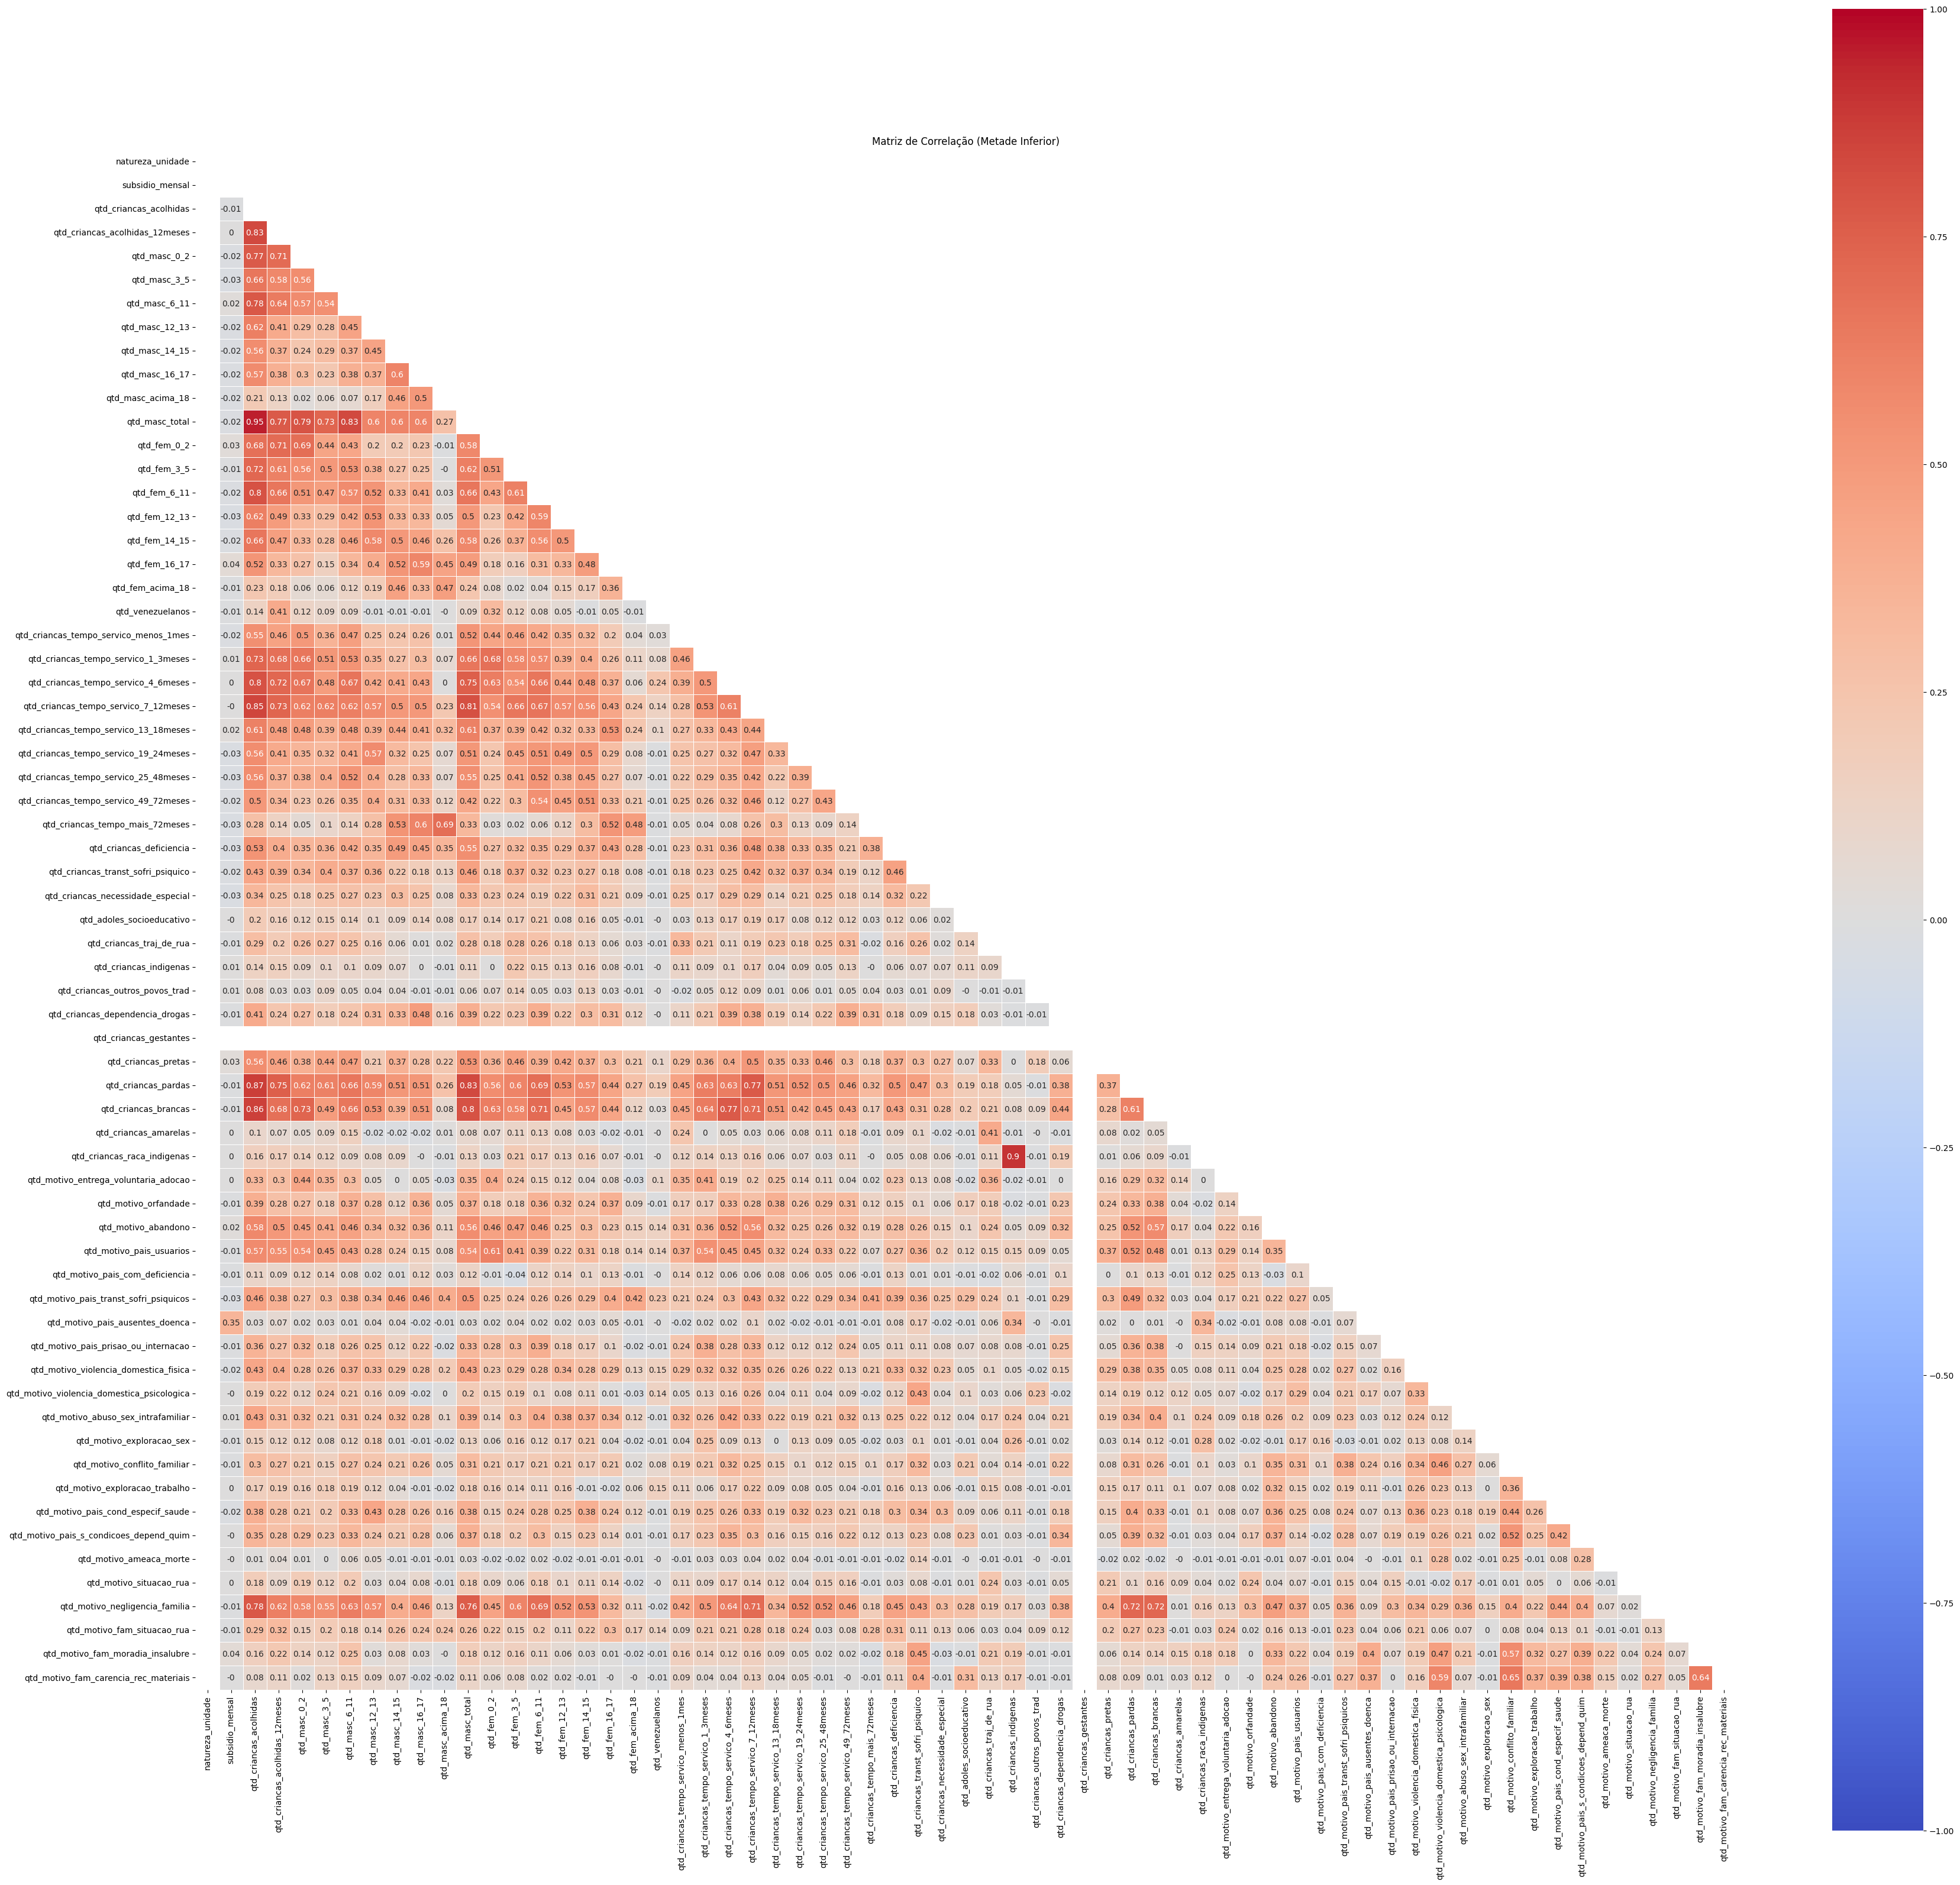

In [18]:
# Cria a matriz de correlação
matriz_correlacao = df_filtrado.corr().round(2)

# Define uma máscara para ocultar a metade superior da matriz
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

# Configura o gráfico
plt.figure(figsize=(42, 40))
sns.heatmap(matriz_correlacao, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Matriz de Correlação (Metade Inferior)')
#plt.savefig("matriz_correlacao.png", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
# Define o limiar de correlação
limiar = 0.8

# Encontra pares de colunas com correlação acima do limiar (ignorando a diagonal)
correlacoes_altas = set()
for i in range(len(matriz_correlacao.columns)):
    for j in range(i + 1, len(matriz_correlacao.columns)):
        if abs(matriz_correlacao.iloc[i, j]) > limiar:
            # Ordena os pares para evitar duplicatas
            var1 = matriz_correlacao.index[i]
            var2 = matriz_correlacao.columns[j]
            if var1 > var2:
                var1, var2 = var2, var1
            # Adiciona o par ordenado ao conjunto
            correlacoes_altas.add((var1, var2, matriz_correlacao.iloc[i, j]))

# Exibe as correlações altas
df_correlacoes = pd.DataFrame(correlacoes_altas, columns=["Variável 1", "Variável 2", "Correlação"])
df_correlacoes = df_correlacoes.sort_values(by="Correlação", ascending=False).reset_index(drop=True)
df_correlacoes

,Variável 1,Variável 2,Correlação
0,qtd_criancas_acolhidas,qtd_masc_total,0.95
1,qtd_criancas_indigenas,qtd_criancas_raca_indigenas,0.90
2,qtd_criancas_acolhidas,qtd_criancas_pardas,0.87
3,qtd_criancas_acolhidas,qtd_criancas_brancas,0.86
4,qtd_criancas_acolhidas,qtd_criancas_tempo_servico_7_12meses,0.85
5,qtd_criancas_pardas,qtd_masc_total,0.83
6,qtd_masc_6_11,qtd_masc_total,0.83
7,qtd_criancas_acolhidas,qtd_criancas_acolhidas_12meses,0.83
8,qtd_criancas_tempo_servico_7_12meses,qtd_masc_total,0.81
